# Hypothesis Testing - Learning

This will be an entirely self-directed learning on the ins and outs of hypothesis testing, based my search for online resources, ChatGPT guidance and continuous questioning of every single concept. Primary mode of learning is by doing, and translating every question into Python code.

## Defining Hypotheses

Defining Hypotheses
First of all, we should understand which scientific question we are looking for an answer to, and it should be formulated in the form of the Null Hypothesis (H₀) and the Alternative Hypothesis (H₁ or Hₐ). Please remember that H₀ and H₁ must be mutually exclusive, and H₁ shouldn’t contain equality:

H₀: μ=x, H₁: μ≠x  
H₀: μ≤x, H₁: μ>x  
H₀: μ≥x, H₁: μ<x  

### Assumption Checks
To decide whether to use the parametric or nonparametric version of the test, we should check the specific requirements listed below:

Observations in each sample are independent and identically distributed (IID).  (how to test?)  
Observations in each sample are normally distributed.  (how to test?)    
Observations in each sample have the same variance.  (how to test?)   

#### Test for Independence - Durbin Watson (~2)

Sample 1 (IID normal): Durbin-Watson statistic: 1.9388304129545857
Sample 2 (positive autocorrelation): Durbin-Watson statistic: 0.12260424607040299
Sample 3 (alternating): Durbin-Watson statistic: 3.8666666666666667


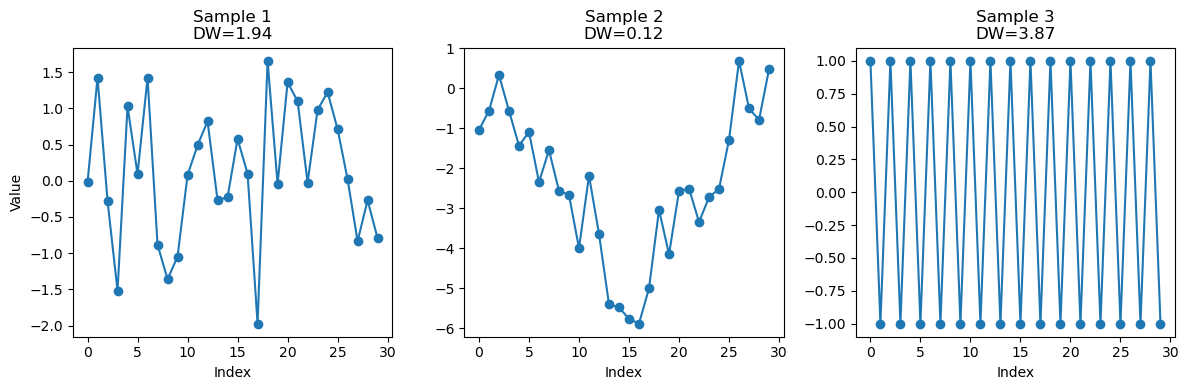

In [3]:
# Observations in each sample are independent and identically distributed (IID).  (how to test?)  
import numpy as np
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

# Sample 1: IID normal random variables (should be independent, DW ~2)
x1 = np.random.normal(loc=0, scale=1, size=30)
dw_stat1 = durbin_watson(x1)

# Sample 2: Strong positive autocorrelation (DW < 1)
x2 = np.cumsum(np.random.normal(loc=0, scale=1, size=30))
dw_stat2 = durbin_watson(x2)

# Sample 3: Alternating pattern (DW > 3)
x3 = np.array([1 if i % 2 == 0 else -1 for i in range(30)])
dw_stat3 = durbin_watson(x3)

print("Sample 1 (IID normal): Durbin-Watson statistic:", dw_stat1)
print("Sample 2 (positive autocorrelation): Durbin-Watson statistic:", dw_stat2)
print("Sample 3 (alternating): Durbin-Watson statistic:", dw_stat3)

# Plot the samples using fig, ax approach
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(x1, marker='o')
ax[0].set_title(f'Sample 1\nDW={dw_stat1:.2f}')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Value')

ax[1].plot(x2, marker='o')
ax[1].set_title(f'Sample 2\nDW={dw_stat2:.2f}')
ax[1].set_xlabel('Index')

ax[2].plot(x3, marker='o')
ax[2].set_title(f'Sample 3\nDW={dw_stat3:.2f}')
ax[2].set_xlabel('Index')

fig.tight_layout()
plt.show()

# Values near 2 suggest independence; <1 or >3 indicate autocorrelation.

#### Test for Identical Distribution - Kolmogorov-Smirnov (high p value)

KS statistic (x1 vs x2): 0.6666666666666666 p-value: 1.2750060342394341e-06
KS statistic (x1 vs x3): 0.36666666666666664 p-value: 0.034580084963334506
KS statistic (x2 vs x3): 0.7666666666666667 p-value: 6.531235554884833e-09


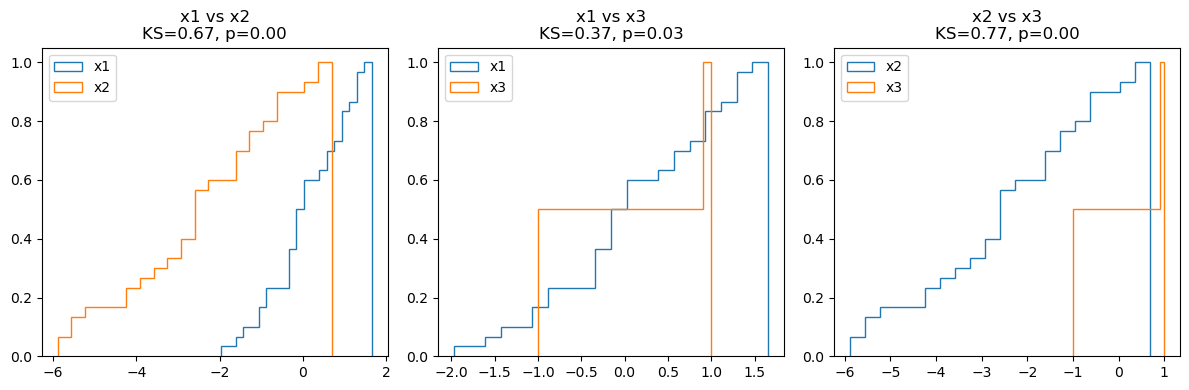

In [4]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Use the same data as the previous cell
# x1: IID normal random variables
# x2: Strong positive autocorrelation
# x3: Alternating pattern

# Test for identical distribution between x1 and x2
ks_stat_1_2, p_value_1_2 = ks_2samp(x1, x2)
print("KS statistic (x1 vs x2):", ks_stat_1_2, "p-value:", p_value_1_2)

# Test for identical distribution between x1 and x3
ks_stat_1_3, p_value_1_3 = ks_2samp(x1, x3)
print("KS statistic (x1 vs x3):", ks_stat_1_3, "p-value:", p_value_1_3)

# Test for identical distribution between x2 and x3
ks_stat_2_3, p_value_2_3 = ks_2samp(x2, x3)
print("KS statistic (x2 vs x3):", ks_stat_2_3, "p-value:", p_value_2_3)

# Plot the cumulative distributions for visual comparison
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# CDF for x1 vs x2
ax[0].hist(x1, bins=20, density=True, cumulative=True, histtype='step', label='x1')
ax[0].hist(x2, bins=20, density=True, cumulative=True, histtype='step', label='x2')
ax[0].set_title(f'x1 vs x2\nKS={ks_stat_1_2:.2f}, p={p_value_1_2:.2f}')
ax[0].legend()

# CDF for x1 vs x3
ax[1].hist(x1, bins=20, density=True, cumulative=True, histtype='step', label='x1')
ax[1].hist(x3, bins=20, density=True, cumulative=True, histtype='step', label='x3')
ax[1].set_title(f'x1 vs x3\nKS={ks_stat_1_3:.2f}, p={p_value_1_3:.2f}')
ax[1].legend()

# CDF for x2 vs x3
ax[2].hist(x2, bins=20, density=True, cumulative=True, histtype='step', label='x2')
ax[2].hist(x3, bins=20, density=True, cumulative=True, histtype='step', label='x3')
ax[2].set_title(f'x2 vs x3\nKS={ks_stat_2_3:.2f}, p={p_value_2_3:.2f}')
ax[2].legend()

fig.tight_layout()
plt.show()

# High p-value (>0.05) suggests samples are identically distributed.

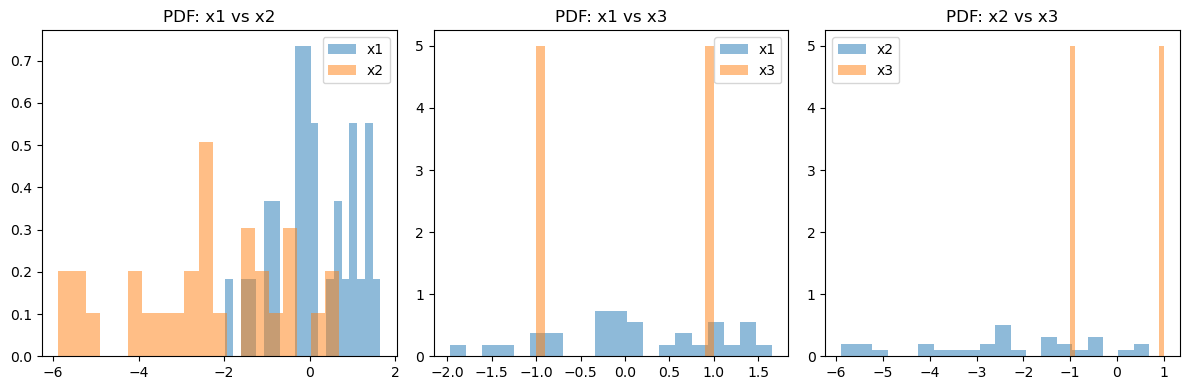

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the PDFs for visual comparison
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# PDF for x1 vs x2
ax[0].hist(x1, bins=20, density=True, alpha=0.5, label='x1')
ax[0].hist(x2, bins=20, density=True, alpha=0.5, label='x2')
ax[0].set_title('PDF: x1 vs x2')
ax[0].legend()

# PDF for x1 vs x3
ax[1].hist(x1, bins=20, density=True, alpha=0.5, label='x1')
ax[1].hist(x3, bins=20, density=True, alpha=0.5, label='x3')
ax[1].set_title('PDF: x1 vs x3')
ax[1].legend()

# PDF for x2 vs x3
ax[2].hist(x2, bins=20, density=True, alpha=0.5, label='x2')
ax[2].hist(x3, bins=20, density=True, alpha=0.5, label='x3')
ax[2].set_title('PDF: x2 vs x3')
ax[2].legend()

fig.tight_layout()
plt.show()